In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.cluster import DBSCAN

from sklearn.datasets import make_moons

In [ ]:
mnist = fetch_openml('mnist_784', version=1, as_frame=True)
mnist.keys()

## Ejercicio 1. 

DBScan nos separó cada medialuna en hartos pedazos. Si te fijas en el pedazo verde, esto puede haber sido por que hay unos puntos que están un poco lejos. Si queremos que el pedazo verde y el azul, por ejemplo, nos quede en una componente conexa, tendríamos que aumentar la distancia bajo la cual consideramos dos puntos _conectados_. Prueba ahora usando algunos valores de epsilon más grande. ¿Cómo queda ahora el clúster? 

In [6]:
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [9]:
def diff_epsilions(epsilion):
    cmap_bold = ['#803260', '#3956b1', '#e614e3', '#64a0b9', '#6eab04', '#467b5c', '#17fa19', '#FF0000']

    dbscan = DBSCAN(eps=epsilion, min_samples=5)
    y_pred = dbscan.fit_predict(X)
    unique = np.unique(y_pred)
    clusters = len([x for x in unique if x >= 0])
    outliers = len([x for x in unique if 0 > x])

    plt.figure(figsize=(7, 7))
    plt.scatter(X[y_pred==0, 0], X[y_pred==0, 1], c=cmap_bold[0], label='0')
    plt.scatter(X[y_pred==1, 0], X[y_pred==1, 1], c=cmap_bold[1], label='1')
    plt.scatter(X[y_pred==2, 0], X[y_pred==2, 1], c=cmap_bold[2], label='2')
    plt.scatter(X[y_pred==3, 0], X[y_pred==3, 1], c=cmap_bold[3], label='3')
    plt.scatter(X[y_pred==4, 0], X[y_pred==4, 1], c=cmap_bold[4], label='4')
    plt.scatter(X[y_pred==5, 0], X[y_pred==5, 1], c=cmap_bold[5], label='5')
    plt.scatter(X[y_pred==6, 0], X[y_pred==6, 1], c=cmap_bold[6], label='6')
    plt.scatter(X[y_pred==-1, 0], X[y_pred==-1, 1], c=cmap_bold[7], label='Outlier')

    plt.title(f"Epsilion={epsilion}, clusters={clusters}, Outliers={outliers}")
    plt.legend()
    plt.show()
    



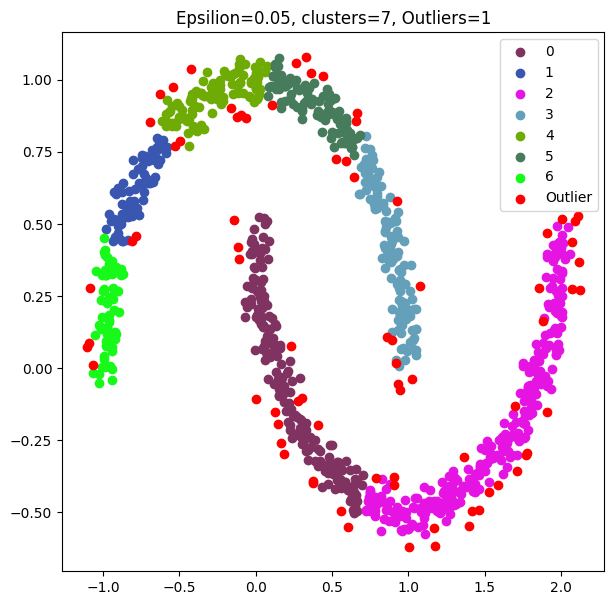

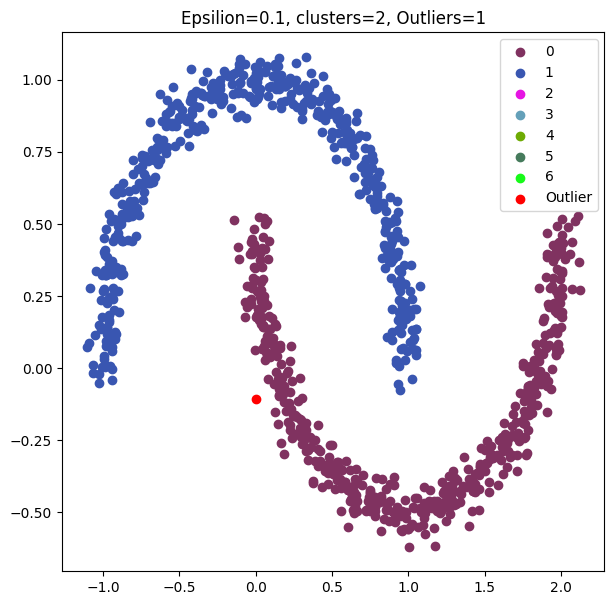

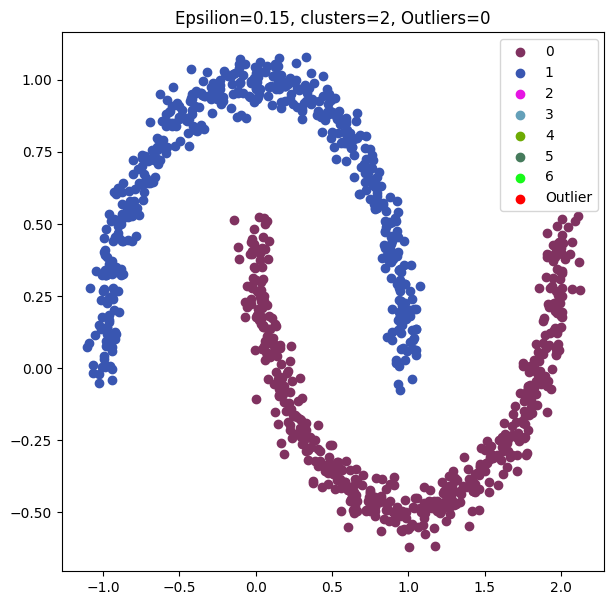

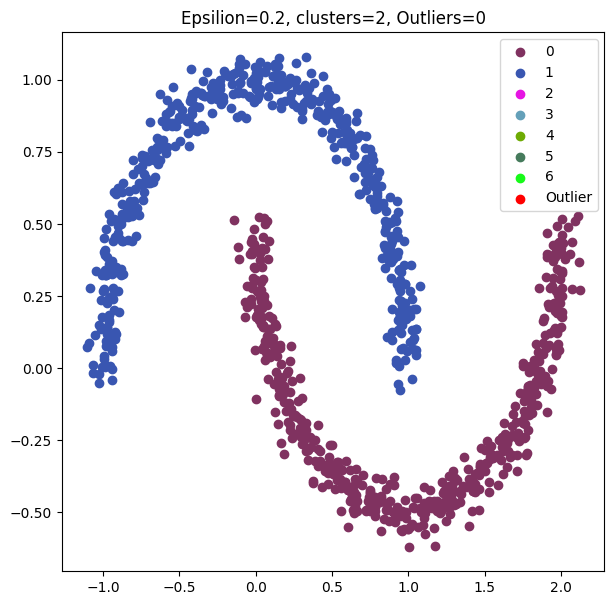

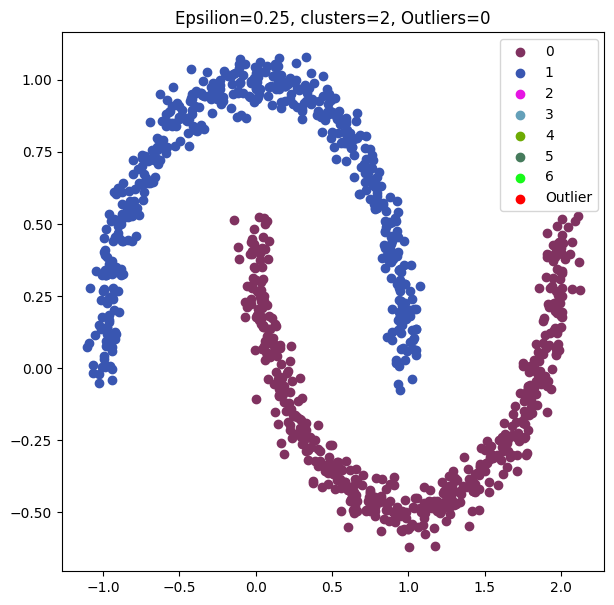

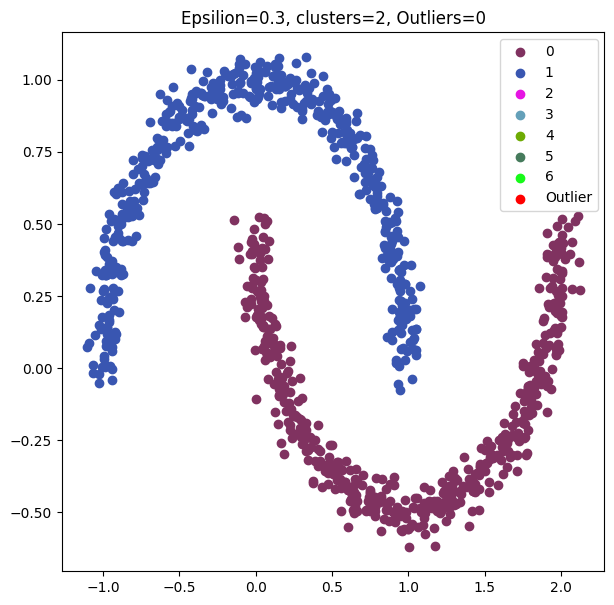

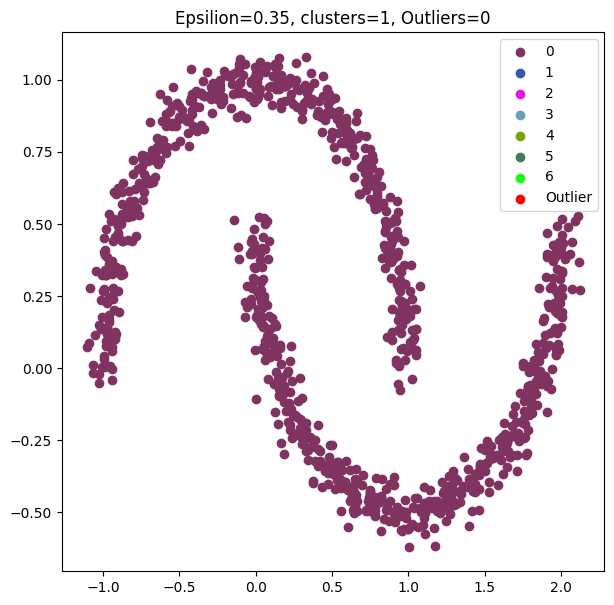

In [10]:
for i in [x/100 for x in range(5, 40, 5)]:
    diff_epsilions(i)

<strong>Respuesta:</strong> <p>Vemos que mientras más aumenta el epsilon, disminuye la cantidad de cluster. Así que son inversamente proporcionales</p>

## Ejercicio 2

Mira como clasifican estos dos algoritmos el dataset MNIST de la tarea. Concentrate sólo en el set de datos resultante de reducir la dimensionalidad con T-SNE 

In [3]:
!pip install tensorflow

  Using cached wheel-0.44.0-py3-none-any.whl.metadata (2.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.4/601.4 MB 17.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 70.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 101.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 65.3 MB/s eta 0:00:00
Using cached wheel-0.44.0-py3-none-any.whl (67 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.1
    Uninstalling numpy-2.0.1:
      Successfully uninstalled numpy-2.0.1


In [4]:
from tensorflow.keras.datasets import mnist

2024-10-01 19:29:28.669870: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-01 19:29:28.889160: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-01 19:29:29.102169: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-01 19:29:29.337588: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-01 19:29:29.394363: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-01 19:29:29.805761: I tensorflow/core/platform/cpu_feature_gu

ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

SystemError: initialization of _pywrap_checkpoint_reader raised unreported exception